In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/Anil Gaikwad/Downloads/BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [23]:
# 1. Range of selling prices
price_range = df["selling_price"].min(), df["selling_price"].max()
print("Selling Price Range:", price_range)


Selling Price Range: (np.int64(5000), np.int64(760000))


In [24]:
# 2. Median selling price
median_price = df["selling_price"].median()
print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


In [25]:
# 3. Most common seller type
common_seller = df["seller_type"].mode()[0]
print("Most Common Seller Type:", common_seller)


Most Common Seller Type: Individual


In [26]:
# 4. Bikes driven more than 50,000 km
high_mileage_bikes = df[df["km_driven"] > 50000].shape[0]
print("Bikes with more than 50,000 km:", high_mileage_bikes)

Bikes with more than 50,000 km: 170


In [27]:
# 5. Average km driven by ownership type
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
print("Average km driven by ownership type:\n", avg_km_by_owner)

Average km driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [28]:
# 6. Proportion of bikes from 2015 or older
older_bikes_proportion = (df[df["year"] <= 2015].shape[0] / len(df)) * 100
print("Proportion of bikes from 2015 or older:", older_bikes_proportion, "%")


Proportion of bikes from 2015 or older: 56.64467483506126 %


In [29]:
# 7. Missing values trend
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
age                    0
dtype: int64


In [30]:
# 8. Highest ex-showroom price and corresponding bike
highest_ex_price = df["ex_showroom_price"].max()
highest_ex_bike = df[df["ex_showroom_price"] == highest_ex_price]["name"].values[0]
print("Highest Ex-Showroom Price:", highest_ex_price, "Bike:", highest_ex_bike)

Highest Ex-Showroom Price: 1278000.0 Bike: Harley-Davidson Street Bob


In [31]:
# 9. Total bikes by seller type
bikes_by_seller = df["seller_type"].value_counts()
print("Bikes Listed by Seller Type:\n", bikes_by_seller)

Bikes Listed by Seller Type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
# 10. Relationship between selling price and km driven for first-owner bikes
sns.scatterplot(data=df[df["owner"] == "1st owner"], x="km_driven", y="selling_price")
plt.title("Selling Price vs KM Driven for 1st Owner Bikes")
plt.show()

In [34]:
# 11. Removing outliers in km_driven using IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df["km_driven"] >= (Q1 - 1.5 * IQR)) & (df["km_driven"] <= (Q3 + 1.5 * IQR))]
print("Outliers removed from km_driven column.")

Outliers removed from km_driven column.


In [ ]:
# 12. Bivariate analysis of year and selling price
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()

In [36]:
# 13. Average depreciation in selling price based on bike's age
current_year = 2025
df["age"] = current_year - df["year"]
depreciation = df.groupby("age")["selling_price"].mean()
print("Average Depreciation by Bike Age:\n", depreciation)


Average Depreciation by Bike Age:
 age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [37]:
# 14. Bikes priced significantly above average for their year
avg_price_by_year = df.groupby("year")["selling_price"].mean()
df["above_avg_price"] = df.apply(lambda row: row["selling_price"] > avg_price_by_year[row["year"]], axis=1)
expensive_bikes = df[df["above_avg_price"]][["name", "year", "selling_price"]]
print("Bikes Priced Above Average:\n", expensive_bikes)

Bikes Priced Above Average:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


In [ ]:
# 15. Correlation matrix and heatmap
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# EDA-2 CAR SALES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
file_path = "Car Sale.csv"
df = pd.read_csv("C:/Users/Anil Gaikwad/Downloads/Car Sale.csv")


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [8]:
# Q1: Average selling price per dealer
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Q1: Average selling price per dealer:\n", avg_price_per_dealer)

Q1: Average selling price per dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28

In [9]:

# Q2: Variation in car prices per company
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("\nQ2: Price variation per company:\n", price_variation)


Q2: Price variation per company:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


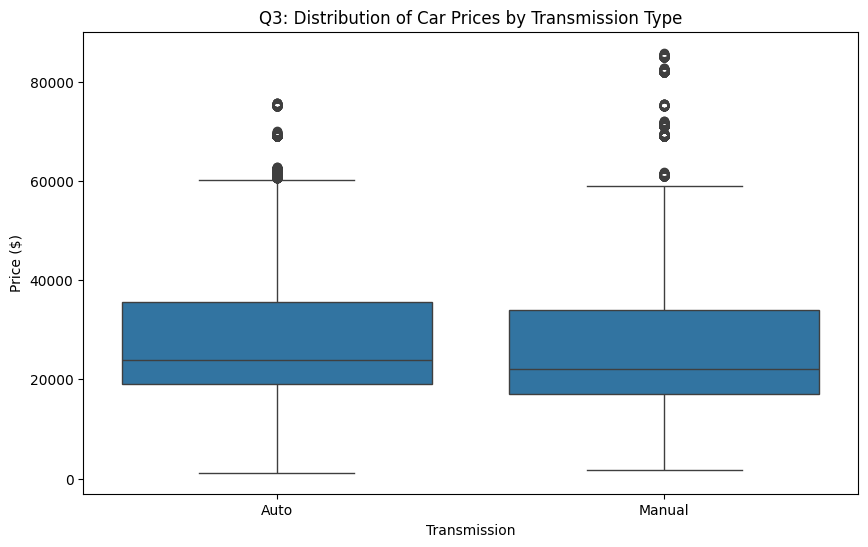

In [10]:
# Q3: Distribution of car prices by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Q3: Distribution of Car Prices by Transmission Type')
plt.show()

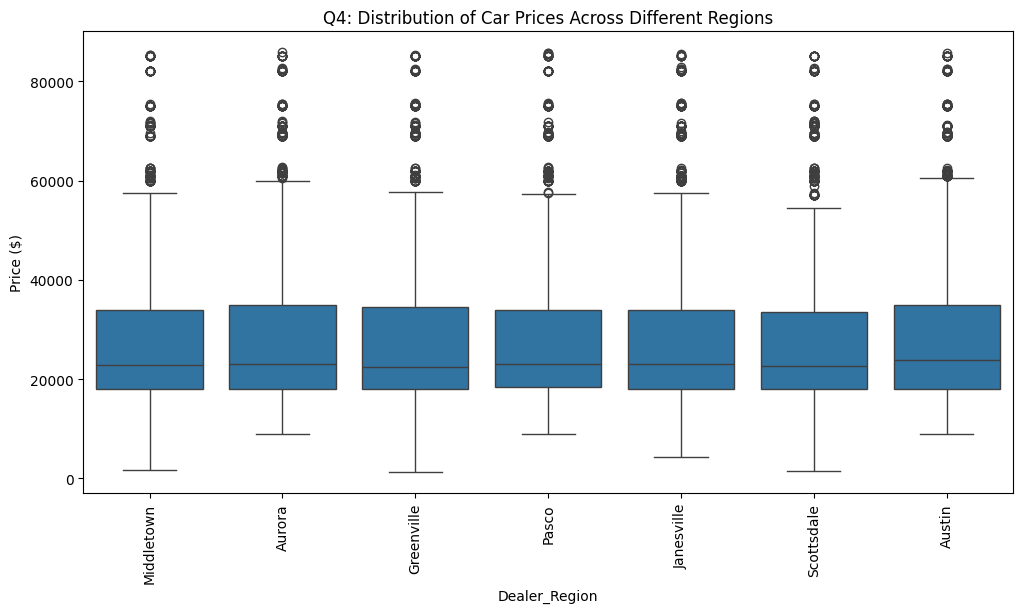

In [11]:
# Q4: Distribution of car prices across regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=90)
plt.title('Q4: Distribution of Car Prices Across Different Regions')
plt.show()


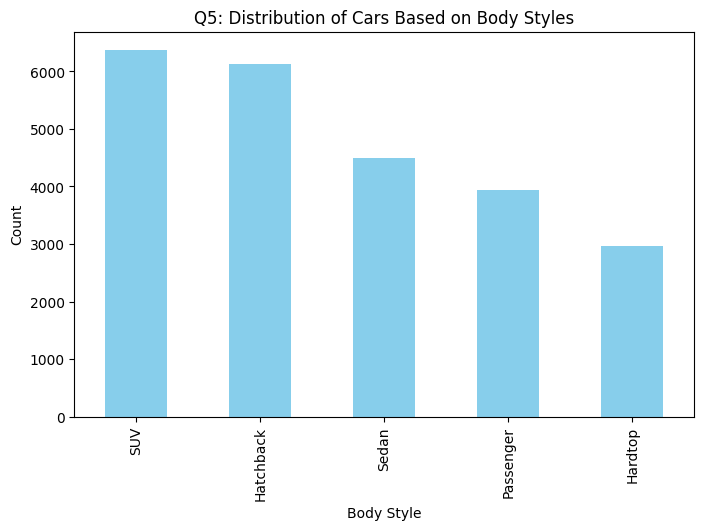

In [12]:
# Q5: Distribution of body styles
plt.figure(figsize=(8, 5))
df['Body Style'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Q5: Distribution of Cars Based on Body Styles')
plt.ylabel('Count')
plt.show()

In [13]:

# Q6: Average car price by gender and annual income
gender_income_price = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()
print("\nQ6: Average Car Price by Gender and Annual Income:\n", gender_income_price)


Q6: Average Car Price by Gender and Annual Income:
 Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  7650000  

In [14]:
# Q7: Distribution of car prices by region and number of cars sold
region_sales = df.groupby('Dealer_Region').agg({'Price ($)': 'mean', 'Car_id': 'count'})
print("\nQ7: Car price distribution and sales count by region:\n", region_sales)


Q7: Car price distribution and sales count by region:
                   Price ($)  Car_id
Dealer_Region                      
Aurora         28334.626837    3130
Austin         28341.603628    4135
Greenville     28180.819054    3128
Janesville     27833.350955    3821
Middletown     27856.338875    3128
Pasco          28119.039923    3131
Scottsdale     27954.958928    3433


In [15]:

# Q8: Average car price by engine size
engine_price = df.groupby('Engine')['Price ($)'].mean().sort_values()
print("\nQ8: Average car price by engine size:\n", engine_price)


Q8: Average car price by engine size:
 Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64


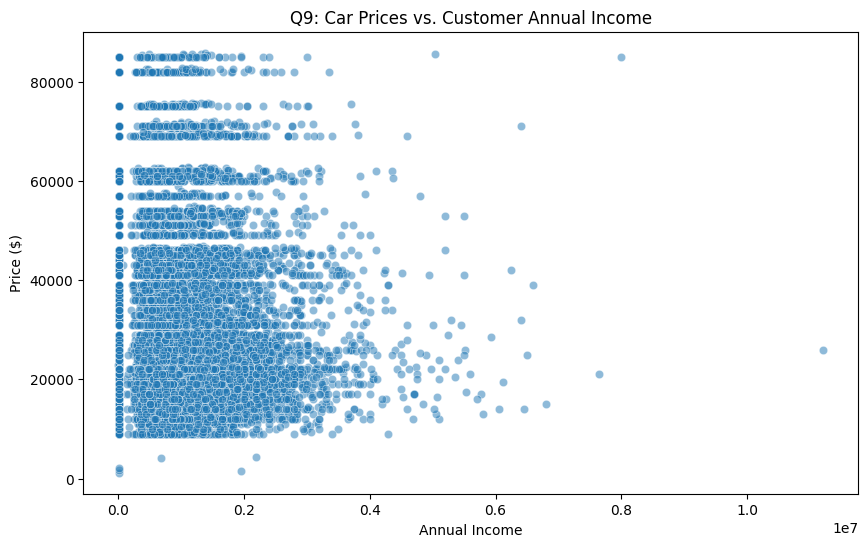

In [16]:
# Q9: Car prices vs. customer income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df, alpha=0.5)
plt.title('Q9: Car Prices vs. Customer Annual Income')
plt.show()

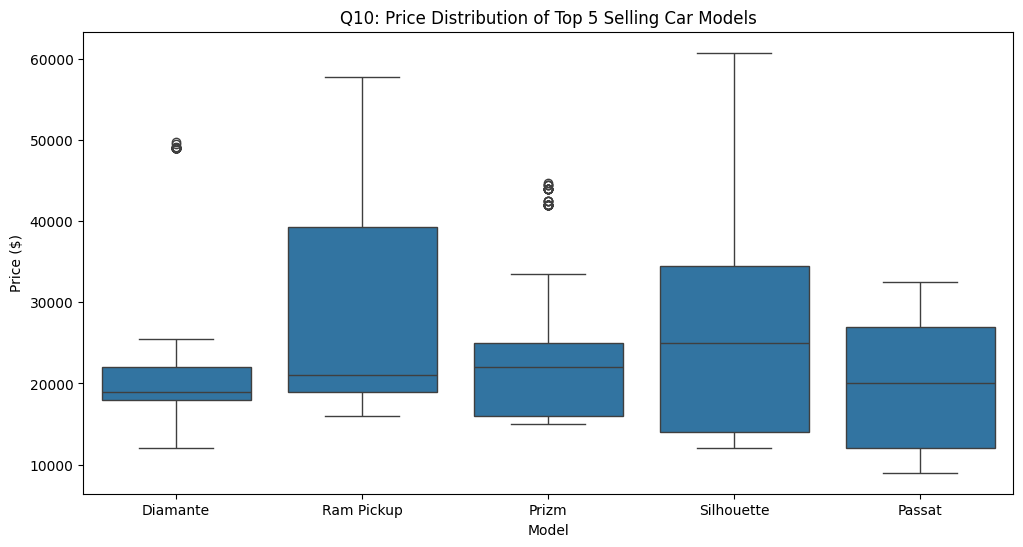

In [17]:
# Q10: Top 5 car models with highest sales and their price distribution
top_models = df['Model'].value_counts().head(5).index
top_model_prices = df[df['Model'].isin(top_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_model_prices)
plt.title('Q10: Price Distribution of Top 5 Selling Car Models')
plt.show()

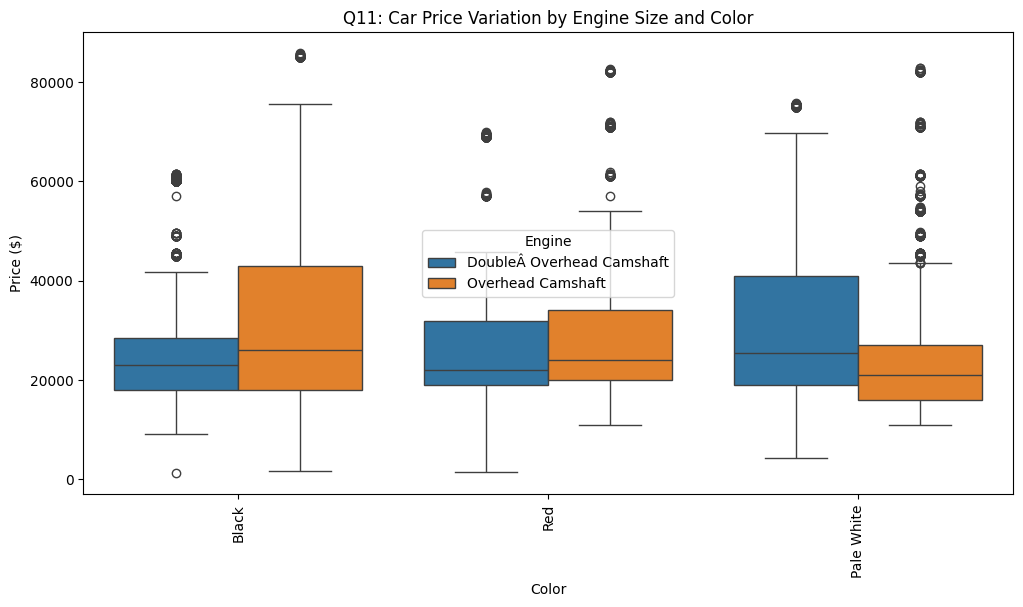

In [18]:

# Q11: Car price variation by engine size and color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)
plt.xticks(rotation=90)
plt.title('Q11: Car Price Variation by Engine Size and Color')
plt.show()


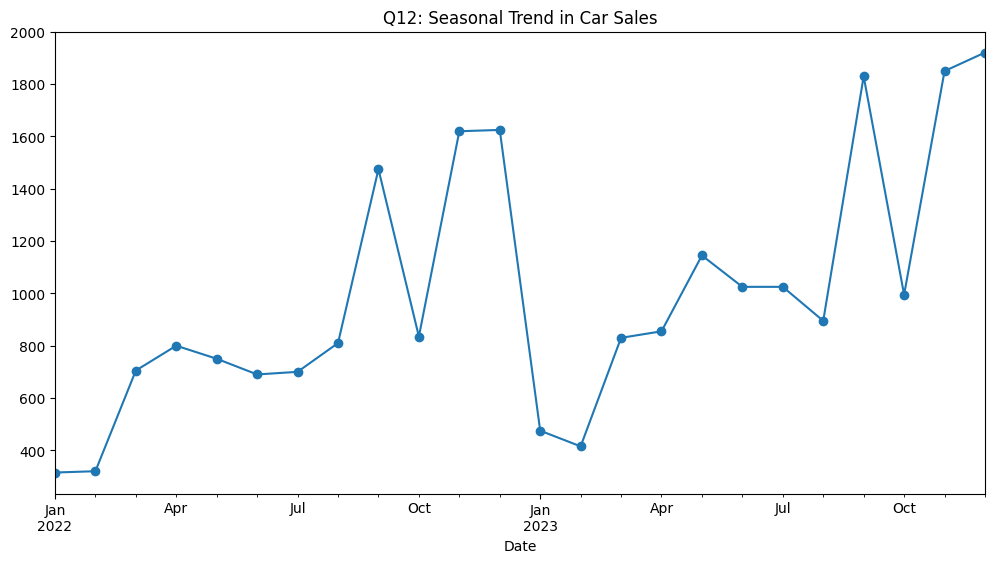

In [20]:

# Q12: Seasonal trend in car sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Car_id'].count()
monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Q12: Seasonal Trend in Car Sales')
plt.show()

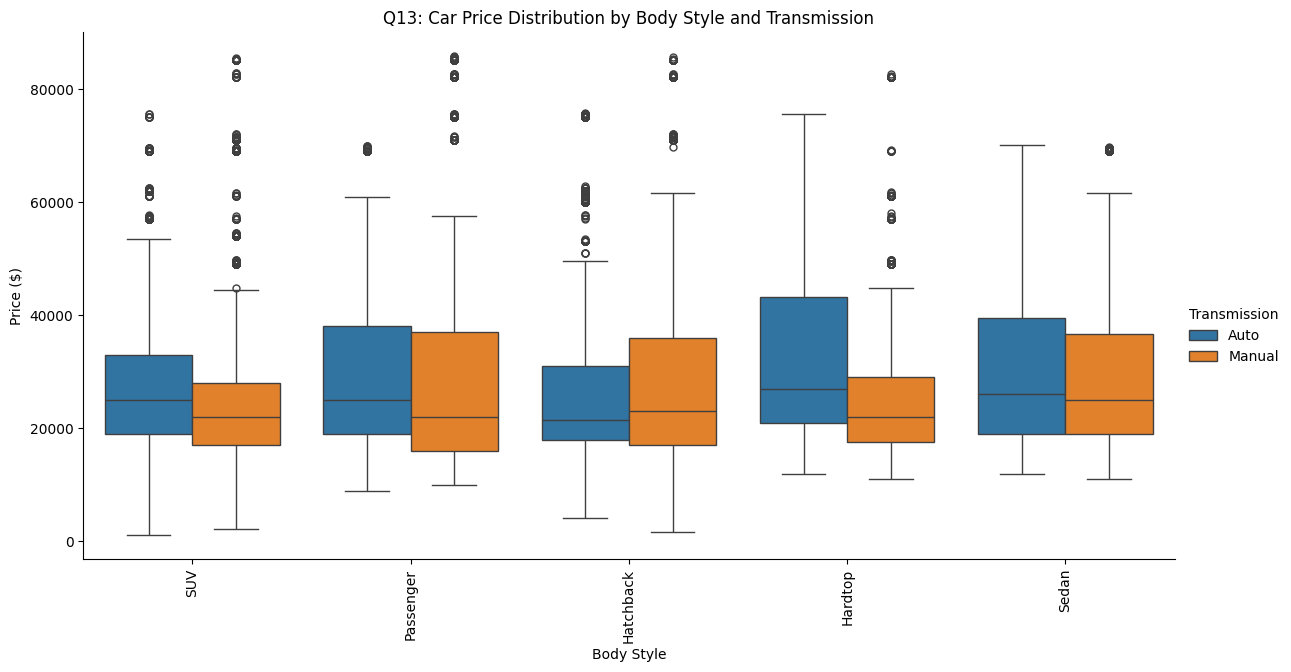

In [21]:
# Q13: Car price distribution by body style and transmission
g = sns.catplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, kind='box', height=6, aspect=2)
g.set_xticklabels(rotation=90)
plt.title('Q13: Car Price Distribution by Body Style and Transmission')
plt.show()

In [22]:
# Q14: Correlation between price, engine size, and income
numeric_df = df[['Price ($)', 'Annual Income']].copy()
numeric_df['Engine_Size'] = df['Engine'].astype('category').cat.codes
correlation_matrix = numeric_df.corr()
print("\nQ14: Correlation Matrix:\n", correlation_matrix)



Q14: Correlation Matrix:
                Price ($)  Annual Income  Engine_Size
Price ($)       1.000000       0.012065    -0.011271
Annual Income   0.012065       1.000000    -0.006598
Engine_Size    -0.011271      -0.006598     1.000000


In [23]:
# Q15: Average car price by model and engine type
model_engine_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("\nQ15: Average Car Price by Model and Engine Type:\n", model_engine_price)



Q15: Average Car Price by Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


In [ ]:
#EDA-3 Amazon Sales Data

In [24]:

# Load the dataset
amazon_file_path = "/mnt/data/amazon.csv"
df = pd.read_csv("C:/Users/Anil Gaikwad/Downloads/amazon.csv")

In [25]:
# Convert relevant columns to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

In [26]:

# Q1: Average rating for each product category
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Q1: Average rating per category:\n", avg_rating_per_category)

Q1: Average rating per category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories

In [27]:

# Q2: Top-rated products by category
top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax(), ['category', 'product_name', 'rating', 'rating_count']]
print("\nQ2: Top rating_count products by category:\n", top_rated_products)


Q2: Top rating_count products by category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...     3.8        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...     4.3        4426.0  
906   

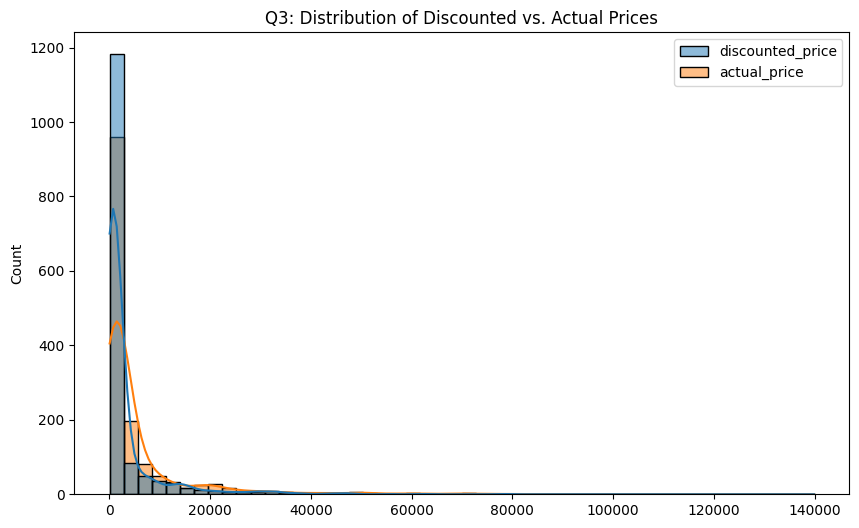

In [28]:
# Q3: Distribution of discounted vs. actual prices
plt.figure(figsize=(10, 6))
sns.histplot(df[['discounted_price', 'actual_price']], bins=50, kde=True)
plt.title("Q3: Distribution of Discounted vs. Actual Prices")
plt.show()

In [29]:

# Q4: Average discount percentage across categories
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nQ4: Average discount percentage per category:\n", avg_discount_per_category)


Q4: Average discount percentage per category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper         

In [30]:
# Q5: Most popular product names
popular_products = df['product_name'].value_counts().head(10)
print("\nQ5: Most popular product names:\n", popular_products)


Q5: Most popular product names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                          

In [31]:

# Q6: Most popular product keywords
popular_keywords = df['product_name'].str.split().explode().value_counts().head(10)
print("\nQ6: Most popular product keywords:\n", popular_keywords)


Q6: Most popular product keywords:
 product_name
with        718
for         614
|           457
&           432
USB         342
and         310
Cable       306
-           220
Charging    212
Fast        208
Name: count, dtype: int64


In [32]:

# Q7: Most popular product reviews
popular_reviews = df['review_content'].value_counts().head(10)
print("\nQ7: Most popular product reviews:\n", popular_reviews)


Q7: Most popular product reviews:
 review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. Th

In [33]:
# Q8: Correlation between discounted price and rating
correlation = df[['discounted_price', 'rating']].corr()
print("\nQ8: Correlation between discounted price and rating:\n", correlation)



Q8: Correlation between discounted price and rating:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [34]:
# Q9: Top 5 categories based on highest ratings
top_categories = df.groupby('category')['rating'].mean().nlargest(5)
print("\nQ9: Top 5 categories with highest ratings:\n", top_categories)


Q9: Top 5 categories with highest ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [36]:
# Q10: Identify potential areas for improvement
missing_values = df.isnull().sum()
print("\nQ10: Missing Values in Dataset:\n", missing_values)

outliers = df[['discounted_price', 'actual_price', 'rating', 'rating_count']].describe(percentiles=[.01, .99])
print("\nQ10: Outlier Detection Summary:\n", outliers)



Q10: Missing Values in Dataset:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Q10: Outlier Detection Summary:
        discounted_price   actual_price       rating   rating_count
count       1465.000000    1465.000000  1464.000000    1463.000000
mean        3125.310874    5444.990635     4.096585   18295.541353
std         6944.304394   10874.826864     0.291674   42753.864952
min           39.000000      39.000000     2.000000       2.000000
1%            86.920000     120.000000     3.200000      13.620000
50%          799.000000    1650.000000     4.100000    5179.000000
99%        34359.000000   57906.000000     4.60000

In [ ]:
#EDA-4 Spotify Data

In [37]:

# Load the dataset
spotify_file_path = "/mnt/data/spotify.csv"
df = pd.read_csv("C:/Users/Anil Gaikwad/Downloads/spotify.csv")

In [38]:

# Check for missing values
df.dropna(inplace=True)

In [39]:

# Check for duplicate rows
df.drop_duplicates(inplace=True)

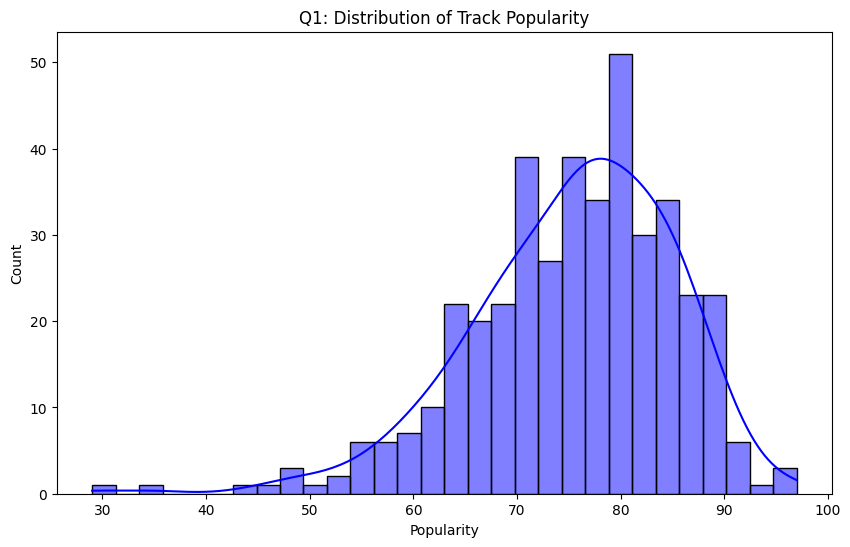

In [40]:

# Q1: Distribution of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title("Q1: Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

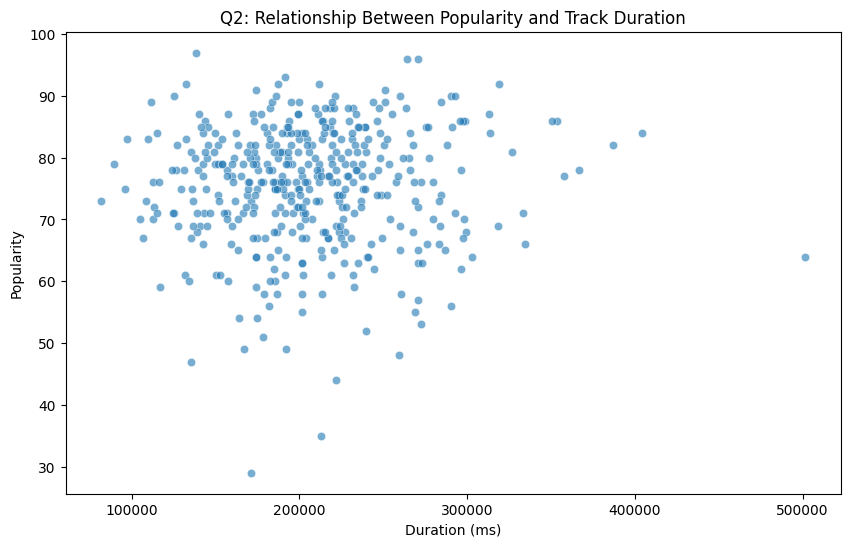

In [41]:
# Q2: Relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.6)
plt.title("Q2: Relationship Between Popularity and Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

C:\Users\Anil Gaikwad\AppData\Local\Temp\ipykernel_13620\1700954332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


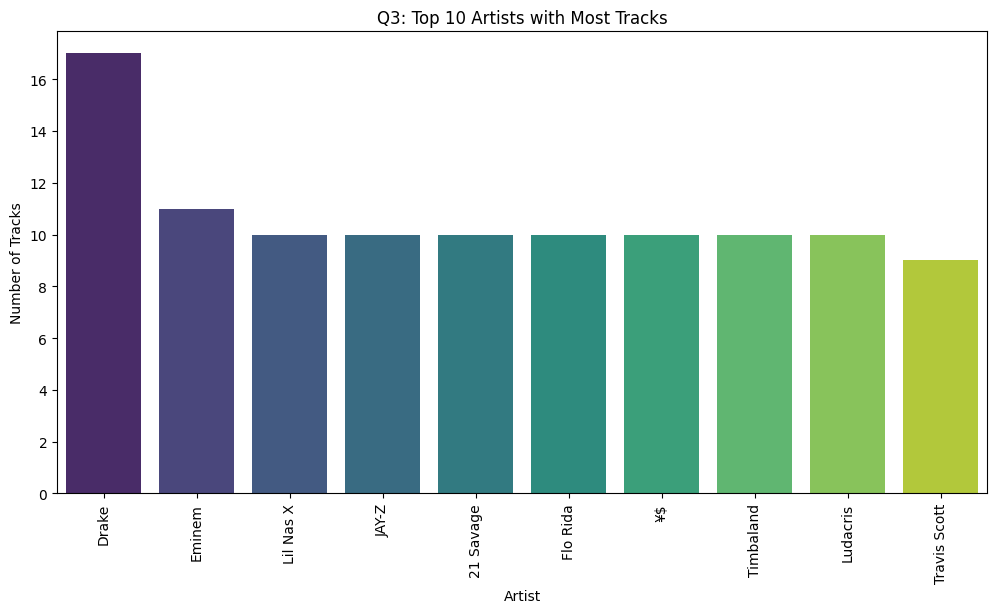

In [43]:
# Q3: Artist with the highest number of tracks
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Q3: Top 10 Artists with Most Tracks")
plt.ylabel("Number of Tracks")
plt.show()

In [44]:

# Q4: Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Q4: Top 5 Least Popular Tracks:\n", least_popular_tracks)

Q4: Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [45]:

# Q5: Most popular artists and their average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Q5: Top 5 Most Popular Artists (by Avg. Popularity):\n", top_5_artists)

Q5: Top 5 Most Popular Artists (by Avg. Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [46]:

# Q6: Most popular tracks of top 5 artists
top_artist_tracks = df[df['Artist'].isin(top_5_artists.index)]
most_popular_tracks = top_artist_tracks.loc[top_artist_tracks.groupby('Artist')['Popularity'].idxmax(), ['Artist', 'Track Name', 'Popularity']]
print("Q6: Most Popular Tracks of Top 5 Artists:\n", most_popular_tracks)


Q6: Most Popular Tracks of Top 5 Artists:
            Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96
